In [64]:
#!pip install pandas-datareader
#!pip install yfinance --upgrade --no-cache-dir
#!pip install plotly
#!pip install chart_studio
#!pip install cufflinks
#!pip install pyfolio

In [88]:
import numpy as np
import pandas as pd
import pyfolio as pf
import yfinance as yf
import cufflinks as cf
import plotly.offline as py
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas_datareader.data as web
from plotly.subplots import make_subplots
import warnings

yf.pdr_override()
cf.go_offline()
warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)

## Obtendo os dados do mercado

In [3]:
ibov = web.get_data_yahoo("^BVSP")


[*********************100%***********************]  1 of 1 completed


In [4]:
type(ibov)

pandas.core.frame.DataFrame

In [5]:
ibov.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
ibov.tail()

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2020-08-07  104116.0  104126.0  101957.0  102776.0   102776.0  10337100
2020-08-10  102776.0  103722.0  101282.0  103444.0   103444.0   8259500
2020-08-11  103449.0  104409.0  102174.0  102174.0   102174.0   9360900
2020-08-12  102176.0  103116.0  100698.0  102118.0   102118.0  10114200
2020-08-13  102118.0  103237.0  100187.0  100461.0   100461.0  10721300

## Média móvel dos dados de fechamento

In [9]:
data = [
    go.Scatter(y=ibov['Close'], name='IBOV'),
    go.Scatter(y=ibov['Close'].rolling(20).mean(), name='Média 20'),
    go.Scatter(y=ibov['Close'].rolling(200).mean(), name='Média 200'),
]

layout = go.Layout(title='Média do Fechamento', width=1000, height=500, xaxis=dict(title_text='Anos'),
 yaxis=dict(title_text='Valor Fechamento'))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## Média móvel dos dados de fechamento de 2008

In [10]:
ibov_fatiado = ibov[ibov.index.year == 2008]
data = [
    go.Scatter(y=ibov_fatiado['Close'], name='IBOV'),
    go.Scatter(y=ibov_fatiado['Close'].rolling(20).mean(), name='Média 20'),
    go.Scatter(y=ibov_fatiado['Close'].rolling(200).mean(), name='Média 200'),
]

layout = go.Layout(title='Média do Fechamento', width=1000, height=500, xaxis=dict(title_text='Anos'),
 yaxis=dict(title_text='Valor Fechamento'))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Média móvel dos dados de fechamento entre 2008 e 2015

In [11]:
ibov_fatiado = ibov[(ibov.index.year >= 2008) & (ibov.index.year <= 2015)]
data = [
    go.Scatter(y=ibov_fatiado['Close'], name='IBOV'),
    go.Scatter(y=ibov_fatiado['Close'].rolling(20).mean(), name='Média 20'),
    go.Scatter(y=ibov_fatiado['Close'].rolling(200).mean(), name='Média 200'),
]

layout = go.Layout(title='Média do Fechamento', width=1000, height=500, xaxis=dict(title_text='Anos'),
 yaxis=dict(title_text='Valor Fechamento'))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [12]:
ibov_fatiado[ibov_fatiado.index.month == 12].tail(10)

Open     High      Low    Close  Adj Close   Volume
Date                                                              
2015-12-15  44748.0  45423.0  44748.0  44872.0    44872.0  2558500
2015-12-16  44868.0  45099.0  44095.0  45016.0    45016.0  3324300
2015-12-17  45016.0  46251.0  45016.0  45261.0    45261.0  3028800
2015-12-18  45249.0  45249.0  43690.0  43911.0    43911.0  4564700
2015-12-21  43912.0  44223.0  43196.0  43200.0    43200.0  3452900
2015-12-22  43208.0  43632.0  43137.0  43470.0    43470.0  2577000
2015-12-23  43479.0  44233.0  43479.0  44015.0    44015.0  2501300
2015-12-28  44016.0  44087.0  43709.0  43764.0    43764.0  1793200
2015-12-29  43781.0  44042.0  43523.0  43654.0    43654.0  1675900
2015-12-30  43653.0  43662.0  43217.0  43350.0    43350.0  2679200

## Dados de abertura e fechamento das ações

In [13]:
base = ibov.tail(100)
data = [go.Candlestick(x=base.index, open=base['Open'], close=base['Close'], low=base['Low'], high=base['High'])]
layout = go.Layout(title='Movimentação da bolsa do ultimos 100 dias')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## Obtendo dados de ações do IBOV e Dolar Real

In [14]:
tickers = ['^BVSP', 'USDBRL=X']
carteira = web.get_data_yahoo(tickers, start='2007-01-01')['Close']

[*********************100%***********************]  2 of 2 completed


In [15]:
carteira.columns

Index(['USDBRL=X', '^BVSP'], dtype='object')

### Identificando correlação

In [16]:
carteira.dropna(inplace=True)
carteira.columns = ['DOLAR', 'IBOV']
carteira.tail()

DOLAR      IBOV
Date                        
2020-08-07  5.3313  102776.0
2020-08-10  5.4372  103444.0
2020-08-11  5.4805  102174.0
2020-08-12  5.3804  102118.0
2020-08-13  5.4350  100461.0

In [30]:

fig = make_subplots(rows=2, cols=1, x_title='Anos', y_title='Valor Fechamento', subplot_titles=('IBOV', 'Dolar'))

fig.add_trace(
    go.Scatter(y=carteira['IBOV'],x=carteira.index, name='IBOV'),
    row=1, col=1)

fig.add_trace(
    go.Scatter(y=carteira['DOLAR'],x=carteira.index, name='Dolar'),
    row=2, col=1)

fig.update_layout(title_text='Ações', width=800)
py.iplot(fig)

In [27]:
carteira.corr()

DOLAR      IBOV  IBOV_DOLARIZADO
DOLAR            1.000000  0.523739        -0.677914
IBOV             0.523739  1.000000         0.209755
IBOV_DOLARIZADO -0.677914  0.209755         1.000000

In [28]:
z = carteira.corr().values
data = [
    go.Heatmap(z=z,
    x=carteira.columns,
    y = carteira.columns[::-1])
]

layout = go.Layout(title='Correlação')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [22]:
corr = carteira['DOLAR'].rolling(252).corr(carteira['IBOV'])

data = go.Scatter(y=corr.values, x=corr.index, name='Correlação')
layout = go.Layout(title='Correlação')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [23]:
carteira['IBOV_DOLARIZADO'] = (carteira['IBOV']/carteira['DOLAR'])

In [24]:
carteira

DOLAR      IBOV  IBOV_DOLARIZADO
Date                                         
2007-01-02  2.1310   45383.0     21296.573959
2007-01-03  2.1345   44445.0     20822.206345
2007-01-04  2.1390   44020.0     20579.710732
2007-01-05  2.1470   42245.0     19676.291819
2007-01-08  2.1465   42830.0     19953.411504
...            ...       ...              ...
2020-08-07  5.3313  102776.0     19277.850469
2020-08-10  5.4372  103444.0     19025.233333
2020-08-11  5.4805  102174.0     18643.188737
2020-08-12  5.3804  102118.0     18979.629129
2020-08-13  5.4350  100461.0     18484.084831

[3332 rows x 3 columns]

In [32]:
fig = make_subplots(rows=3, cols=1, x_title='Anos', y_title='Valor do Fechamento')

fig.add_trace(go.Scatter(x=carteira.index, y=carteira['DOLAR'], name='Dolar'), row=1, col=1)
fig.add_trace(go.Scatter(x=carteira.index, y=carteira['IBOV'], name='IBOV'), row=2, col=1)
fig.add_trace(go.Scatter(x=carteira.index, y=carteira['IBOV_DOLARIZADO'], name='IBOV Dolar'), row=3, col=1)
fig.update_layout(title='Disperção dos dados')

py.iplot(fig)

## Simulando uma carteira de ações

In [34]:
tickers = ['ABEV3.SA', 'ITSA4.SA', 'WEGE3.SA', 'USIM5.SA', 'VALE3.SA']

carteira = web.get_data_yahoo(tickers, period='5y')['Adj Close']
ibov = web.get_data_yahoo('^BVSP', period='5y')['Adj Close']

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [35]:
carteira.head()

ABEV3.SA  ITSA4.SA  USIM5.SA   VALE3.SA   WEGE3.SA
Date                                                           
2015-08-13  16.259537  4.483705  3.453029  16.145348  12.379066
2015-08-14  16.172400  4.471875  3.365734  15.900723  12.073890
2015-08-17  16.198542  4.442301  3.394832  15.734725  11.872753
2015-08-18  16.276962  4.406808  3.259039  15.219262  12.136276
2015-08-19  15.789003  4.341744  3.132945  14.712538  12.122484

In [36]:
ibov.head()

Date
2015-08-13    48010.0
2015-08-14    47508.0
2015-08-17    47217.0
2015-08-18    47451.0
2015-08-19    46588.0
Name: Adj Close, dtype: float64

In [48]:
carteira.iplot(
    layout=dict(title='Fechamento das ações',
    xaxis=dict(title_text='Anos'),
    yaxis=dict(title_text='Valor de fechamento')))

In [52]:
carteira_normalizada = (carteira / carteira.iloc[0]) * 10000
carteira_normalizada

ABEV3.SA      ITSA4.SA      USIM5.SA      VALE3.SA  \
Date                                                                 
2015-08-13  10000.000000  10000.000000  10000.000000  10000.000000   
2015-08-14   9946.408546   9973.614835   9747.190769   9848.485708   
2015-08-17   9962.486568   9907.656175   9831.460973   9745.671256   
2015-08-18  10010.717118   9828.496425   9438.202092   9426.407226   
2015-08-19   9710.610838   9683.385460   9073.033279   9112.555601   
...                  ...           ...           ...           ...   
2020-08-07   8185.965338  22771.346327  24036.865150  37441.126867   
2020-08-10   8142.913282  23105.890230  25137.348439  38525.030444   
2020-08-11   8247.467354  22749.042833  24558.144673  37335.832148   
2020-08-12   8290.518823  22548.315641  25021.508238  38091.468541   
2020-08-13   8124.462736  21990.741051  25166.306418  37379.188102   

                WEGE3.SA  
Date                      
2015-08-13  10000.000000  
2015-08-14   9753.474298  
2015-08-17   9590.993060  
2015-08-18   9803.871085  
2015-08-19   9792.729664  
...                  ...  
2020-08-07  55294.962995  
2020-08-10  55731.184061  
2020-08-11  54422.527026  
2020-08-12  54931.448521  
2020-08-13  55658.483631  

[1244 rows x 5 columns]

In [54]:
carteira_normalizada.iplot(
    layout=dict(title='Fechamento das ações para 10000 ações',
    xaxis=dict(title_text='Anos'),
    yaxis=dict(title_text='Valor de fechamento')))

In [55]:
carteira_normalizada['saldo'] = carteira_normalizada.sum(axis=1)
carteira_normalizada

ABEV3.SA      ITSA4.SA      USIM5.SA      VALE3.SA  \
Date                                                                 
2015-08-13  10000.000000  10000.000000  10000.000000  10000.000000   
2015-08-14   9946.408546   9973.614835   9747.190769   9848.485708   
2015-08-17   9962.486568   9907.656175   9831.460973   9745.671256   
2015-08-18  10010.717118   9828.496425   9438.202092   9426.407226   
2015-08-19   9710.610838   9683.385460   9073.033279   9112.555601   
...                  ...           ...           ...           ...   
2020-08-07   8185.965338  22771.346327  24036.865150  37441.126867   
2020-08-10   8142.913282  23105.890230  25137.348439  38525.030444   
2020-08-11   8247.467354  22749.042833  24558.144673  37335.832148   
2020-08-12   8290.518823  22548.315641  25021.508238  38091.468541   
2020-08-13   8124.462736  21990.741051  25166.306418  37379.188102   

                WEGE3.SA          saldo  
Date                                     
2015-08-13  10000.000000   50000.000000  
2015-08-14   9753.474298   49269.174155  
2015-08-17   9590.993060   49038.268033  
2015-08-18   9803.871085   48507.693946  
2015-08-19   9792.729664   47372.314843  
...                  ...            ...  
2020-08-07  55294.962995  147730.266678  
2020-08-10  55731.184061  150642.366456  
2020-08-11  54422.527026  147313.014034  
2020-08-12  54931.448521  148883.259764  
2020-08-13  55658.483631  148319.181939  

[1244 rows x 6 columns]

In [57]:
ibov_normalizado = ibov / ibov.iloc[0] * 50000
ibov_normalizado

Date
2015-08-13     50000.000000
2015-08-14     49477.192252
2015-08-17     49174.130390
2015-08-18     49417.829619
2015-08-19     48519.058529
                  ...      
2020-08-07    107036.034160
2020-08-10    107731.722558
2020-08-11    106409.081441
2020-08-12    106350.760258
2020-08-13    104625.078109
Name: Adj Close, Length: 1235, dtype: float64

In [62]:
fig = make_subplots(rows=2, cols=1, x_title='Anos', y_title='Valor Fechamento')

fig.add_trace(go.Scatter(y=carteira_normalizada['saldo'], x= carteira_normalizada.index, name='Minha Carteira'), row=1, col=1)

fig.add_trace(go.Scatter(y=ibov_normalizado.values, x=ibov_normalizado.index, name='IBOV'), row=2, col=1)

fig.update_layout(title='Comparação das ações X Ibov', width=800)
py.iplot(fig)


In [67]:
tickers = ['ABEV3.SA', 'ITSA4.SA', 'WEGE3.SA', 'USIM5.SA', 'VALE3.SA', '^BVSP']

dados_yahoo = web.get_data_yahoo(tickers, period='5y')['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [68]:
dados_yahoo.head()

ABEV3.SA  ITSA4.SA  USIM5.SA   VALE3.SA   WEGE3.SA    ^BVSP
Date                                                                    
2015-08-13  16.259537  4.483705  3.453029  16.145348  12.379066  48010.0
2015-08-14  16.172400  4.471875  3.365734  15.900723  12.073890  47508.0
2015-08-17  16.198542  4.442301  3.394832  15.734725  11.872753  47217.0
2015-08-18  16.276962  4.406808  3.259039  15.219262  12.136276  47451.0
2015-08-19  15.789003  4.341744  3.132945  14.712538  12.122484  46588.0

### Calculando o retorno diario dos ativos

In [72]:
retorno = dados_yahoo.pct_change()
retorno

ABEV3.SA  ITSA4.SA  USIM5.SA  VALE3.SA  WEGE3.SA     ^BVSP
Date                                                                  
2015-08-13       NaN       NaN       NaN       NaN       NaN       NaN
2015-08-14 -0.005359 -0.002639 -0.025281 -0.015151 -0.024653 -0.010456
2015-08-17  0.001616 -0.006613  0.008646 -0.010440 -0.016659 -0.006125
2015-08-18  0.004841 -0.007990 -0.040000 -0.032760  0.022196  0.004956
2015-08-19 -0.029978 -0.014764 -0.038691 -0.033295 -0.001136 -0.018187
...              ...       ...       ...       ...       ...       ...
2020-08-07  0.003771 -0.010659 -0.003601 -0.022319 -0.019762 -0.012965
2020-08-10 -0.005259  0.014691  0.045783  0.028950  0.007889  0.006500
2020-08-11  0.012840 -0.015444 -0.023042 -0.030868 -0.023482 -0.012277
2020-08-12  0.005220 -0.008824  0.018868  0.020239  0.009351 -0.000548
2020-08-13 -0.020030 -0.024728  0.005787 -0.018699  0.013235 -0.016226

[1244 rows x 6 columns]

In [77]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

ABEV3.SA  ITSA4.SA  USIM5.SA  VALE3.SA  WEGE3.SA     ^BVSP
Date                                                                  
2015-08-13  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
2015-08-14  0.994641  0.997361  0.974719  0.984849  0.975347  0.989544
2015-08-17  0.996249  0.990766  0.983146  0.974567  0.959099  0.983483
2015-08-18  1.001072  0.982850  0.943820  0.942641  0.980387  0.988357
2015-08-19  0.971061  0.968339  0.907303  0.911256  0.979273  0.970381
...              ...       ...       ...       ...       ...       ...
2020-08-07  0.818597  2.277135  2.403687  3.744113  5.529496  2.140721
2020-08-10  0.814291  2.310589  2.513735  3.852503  5.573118  2.154634
2020-08-11  0.824747  2.274904  2.455814  3.733583  5.442253  2.128182
2020-08-12  0.829052  2.254832  2.502151  3.809147  5.493145  2.127015
2020-08-13  0.812446  2.199074  2.516631  3.737919  5.565848  2.092502

[1244 rows x 6 columns]

In [81]:
carteira = 10000 * retorno_acumulado.iloc[:, :5]
carteira['saldo'] = carteira.sum(axis=1)
carteira['retorno'] = carteira['saldo'].pct_change()
carteira.head()

ABEV3.SA      ITSA4.SA      USIM5.SA      VALE3.SA  \
Date                                                                 
2015-08-13  10000.000000  10000.000000  10000.000000  10000.000000   
2015-08-14   9946.408546   9973.614835   9747.190769   9848.485708   
2015-08-17   9962.486568   9907.656175   9831.460973   9745.671256   
2015-08-18  10010.717118   9828.496425   9438.202092   9426.407226   
2015-08-19   9710.610838   9683.385460   9073.033279   9112.555601   

                WEGE3.SA         saldo   retorno  
Date                                              
2015-08-13  10000.000000  50000.000000       NaN  
2015-08-14   9753.474298  49269.174155 -0.014617  
2015-08-17   9590.993060  49038.268033 -0.004687  
2015-08-18   9803.871085  48507.693946 -0.010820  
2015-08-19   9792.729664  47372.314843 -0.023406

In [84]:
pf.create_full_tear_sheet(carteira['retorno'])

AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

(0.8, 1.4)

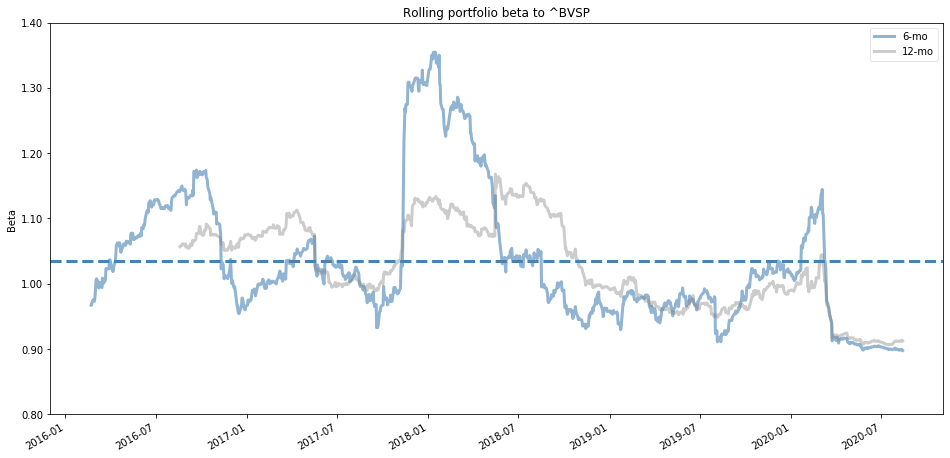

In [89]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira['retorno'], factor_returns=retorno['^BVSP'], ax=ax1)
plt.ylim((0.8, 1.4))